In [1]:
import sys, os
sys.path.append(os.path.abspath('../../../../classifiers'))
sys.path.append(os.path.abspath('../../../../training'))
sys.path.append(os.path.abspath('../../../../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
range_step = 100
k_times_fold = 10

In [3]:
iris = datasets.load_iris()

y = iris.target
X = PCA(n_components=1).fit_transform(iris.data)[:, :]

In [4]:
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = False
dic_classifier_params["normalize_axis"] = 1

In [5]:
dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "do_classes_refit":True,
    "reset_weights_epoch":0,
    "batch":1}

In [6]:
%run ../printing_methods.ipynb

In [7]:
negativities_per_class = []
entropies_per_class = []
for clazz in range(len(set(y))):
    negativities_per_class.append([])
    entropies_per_class.append([])

In [8]:
%%time
scores_list = []
f1scores_list = []

for max_iter in range(1, 1000, range_step):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, output_dict = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed=1, 
                    classifier_function=iqc_classifier, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(np.mean(scores))
    f1scores_list.append(np.mean(f1scores))

    for clazz in range(len(set(y))):
        negativities_per_class[clazz].append(np.mean(output_dict["negativities"][clazz]))
        entropies_per_class[clazz].append(np.mean(output_dict["entropies"][clazz]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

K-Fold #0
Mean negativities for all classes: [-1.7763568394002506e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [9.930622161826242e-16, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.27        15
   macro avg       0.15      0.27      0.19        15
weighted avg       0.15      0.27      0.19        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [-1.7763568394002506e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [9.930622161826244e-16, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.27        15
   macro avg       0.15      0.27      0.19        15
weighted avg       0.15      0.27      0.19        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-1.295260195396016e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [3.2034265038149167e-16, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.17      0.33      0.22        15
weighted avg       0.17      0.33      0.22        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-1.295260195396016e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [3.2034265038149167e-16, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.17      0.33      0.22        15
weighted avg       0.17      0.33      0.22        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [-1.7763568394002506e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [9.930622161826242e-16, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.27        15
   macro avg       0.15      0.27      0.19        15
weighted avg       0.15      0.27      0.19        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-1.295260195396016e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [3.2034265038149167e-16, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.17      0.33      0.22        15
weighted avg       0.17      0.33      0.22        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-1.295260195396016e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [3.2034265038149167e-16, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.17      0.33      0.22        15
weighted avg       0.17      0.33      0.22        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-2.55351295663786e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [1.830607618989317e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.13        15
   macro avg       0.10      0.13      0.11        15
weighted avg       0.10      0.13      0.11        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-2.55351295663786e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [1.830607618989317e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.13        15
   macro avg       0.10      0.13      0.11        15
weighted avg       0.10      0.13      0.11        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-1.295260195396016e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [3.2034265038149167e-16, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.17      0.33      0.22        15
weighted avg       0.17      0.33      0.22        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.2733333333333333 F1-Scores = 0.19047619047619047 Negativity = [-9.992007221626409e-17, -9.992007221626409e-17, -1.1719020815487764e-16] Entropy = [1.2274836681558484e-15, 1.2274836681558484e-15, 1.3862121049260698e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6066666666666667 F1-Scores = 0.49933399933399925 Negativity = [-3.700743415417188e-18, -3.700743415417188e-18, -1.541976423090495e-16] Entropy = [1.5142399558080528e-15, 1.5142399558080528e-15, 1.6964237072446414e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #0
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #3
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [1.1102230246251565e-16, -4.4408920985006264e-17, -7.771561172376095e-17]
Mean entropies for all classes: [1.853331079139237e-15, 2.883083853433425e-16, 2.4010804029415786e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.44      0.80      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.49        15
weighted avg       0.43      0.60      0.49        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582865e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [-1.7023419710919068e-16, 0.0, -2.4794980883295163e-16]
Mean entropies for all classes: [4.117787210594316e-15, -6.74932260410996e-17, 5.059580557582866e-16]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.30      0.47      0.37        15
weighted avg       0.30      0.47      0.37        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9
Mean negativities for all classes: [-2.4054832200211723e-16, -5.551115123125783e-17, -1.6653345369377348e-16]
Mean entropies for all classes: [1.2509774573372063e-15, 3.304389247094231e-15, 5.339044173024862e-16]
              precision    recall  f1-score   support

           0       1.0

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

In [9]:
print_score(scores_list)

Maior Score atingido com 101 épocas: 0.6066666666666667

[0.2733333333333333, 0.6066666666666667, 0.6066666666666667, 0.6066666666666667, 0.6066666666666667, 0.6066666666666667, 0.6066666666666667, 0.6066666666666667, 0.6066666666666667, 0.6066666666666667]




In [10]:
print_f1score(f1scores_list)

Maior F1Score atingido com 101 épocas: 0.49933399933399925

[0.19047619047619047, 0.49933399933399925, 0.49933399933399925, 0.49933399933399925, 0.49933399933399925, 0.49933399933399925, 0.49933399933399925, 0.49933399933399925, 0.49933399933399925, 0.49933399933399925]




Negativities ao longo do treinamento
Classe 0 [-1.691239740845655e-16, -1.2101430968414207e-16, -1.2101430968414207e-16, -1.2101430968414207e-16, -1.2101430968414207e-16, -1.2101430968414207e-16, -1.2101430968414207e-16, -1.2101430968414207e-16, -1.2101430968414207e-16, -1.2101430968414207e-16]
Classe 1 [-4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17, -4.107825191113079e-17]
Classe 2 [-1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16, -1.5617137213060536e-16]




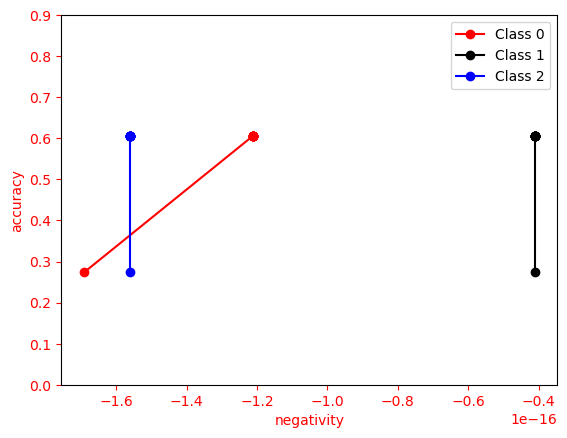

In [11]:
print_negativities(negativities_per_class, scores_list)

Entropies ao longo do treinamento
Classe 0 [8.242115138433966e-16, 2.0050454945292375e-15, 2.0050454945292375e-15, 2.0050454945292375e-15, 2.0050454945292375e-15, 2.0050454945292375e-15, 2.0050454945292375e-15, 2.0050454945292375e-15, 2.0050454945292375e-15, 2.0050454945292375e-15]
Classe 1 [1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15, 1.7251884939418983e-15]
Classe 2 [1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15, 1.088467940685374e-15]




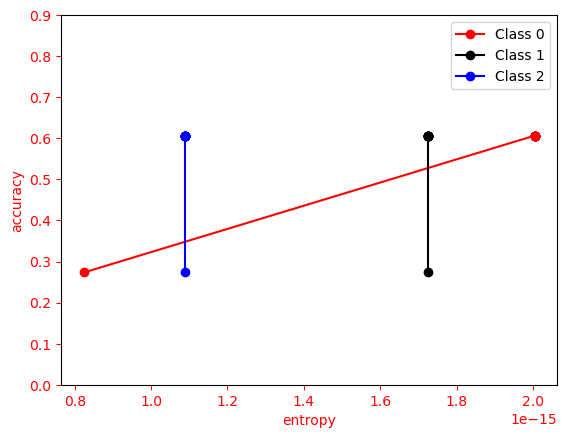

In [12]:
print_entropies(entropies_per_class, scores_list)